In [1]:
import pm4py 
import pandas as pd

In [2]:
bpmn_graph = pm4py.read_bpmn("../../data/BPMN_GROUND_TRUTH/hrrp.xml")
petri_net, im, fm = pm4py.convert_to_petri_net(bpmn_graph)

In [3]:
df_gt = pd.read_csv("../../data_v3/hr_ground_truth.csv",dtype={"bp_id": str})
df_times = pd.read_csv("../../data_v3/hr_il_tagged.csv", usecols=["frame.number","synthetic_sniff_time"],
                       parse_dates=["synthetic_sniff_time"])
df_gt = df_gt.merge(df_times, how="left", left_on="start", right_on="frame.number")

In [4]:
petri_net_t, im_t, fm_t = pm4py.discover_petri_net_inductive(df_gt, case_id_key="bp_id", activity_key="activity_name",timestamp_key="synthetic_sniff_time")

In [5]:
df_gt

,Unnamed: 0,activity_name,start,end,actual_end,overlapping_activities,bp_id,overlapping_bps,classification,Multi Class Classification,Single Class Classification,probability,frame.number,synthetic_sniff_time
0,0,GenerateJobApplicationActivity,17,356,325,[],1224,[],GenerateJobApplicationActivity,TRUE,True,0.994192,17,2020-09-18 13:37:23.875912
1,1,ResumeReviewActivity,356,1212,1192,[],1224,[],ResumeReviewActivity,TRUE,True,0.993149,356,2020-09-19 07:42:27.735647
2,2,GenerateJobApplicationActivity,1212,1582,1520,[],1225,[],GenerateJobApplicationActivity,TRUE,True,0.994192,1212,2020-09-19 12:50:40.564745
3,3,ResumeReviewActivity,1582,2354,2336,[],1225,[],ResumeReviewActivity,TRUE,True,0.993329,1582,2020-09-20 01:16:15.847826
4,4,GenerateJobApplicationActivity,2354,2708,2664,[],1226,[],GenerateJobApplicationActivity,TRUE,True,0.994192,2354,2020-09-20 11:46:14.387302
5,5,ResumeReviewActivity,2708,4467,4461,['ScheduleAnInterviewActivityCall 1225'],1226,[1225],"ResumeReviewActivity, ScheduleAnInterviewActiv...",TRUE,True,0.211112,2708,2020-09-21 05:50:53.524565
6,6,ScheduleAnInterviewActivityCall,3057,4881,4871,"['ResumeReviewActivity 1226', 'GenerateJobAppl...",1225,"[1226, 1227]","ResumeReviewActivity, ScheduleAnInterviewActiv...",TRUE,True,0.021792,3057,2020-09-21 07:13:39.411104
7,7,GenerateJobApplicationActivity,4467,4939,4881,['ScheduleAnInterviewActivityCall 1225'],1227,[1225],GenerateJobApplicationActivity,FALSE,True,0.986619,4467,2020-09-21 11:34:27.745781
8,8,ResumeReviewActivity,4939,6205,6164,['PerformAnInterviewCall 1225'],1227,[1225],ResumeReviewActivity,FALSE,True,0.839890,4939,2020-09-22 00:03:44.701027
9,9,PerformAnInterviewCall,5606,6879,6859,['ResumeReviewActivity 1227'],1225,[1227],PerformAnInterviewCall,FALSE,True,0.962106,5606,2020-09-22 02:51:00.034460


In [6]:
args = {"case_id_key":'case_id', "activity_key":'activity', "timestamp_key":'timestamp'}

log_in = pd.read_csv("../../data_v3/out/hr_xes_out.csv",parse_dates=["timestamp"], dtype={"case_id": str})
#dataframe = pm4py.format_dataframe(log_in, **args)
#event_log = pm4py.convert_to_event_log(dataframe)

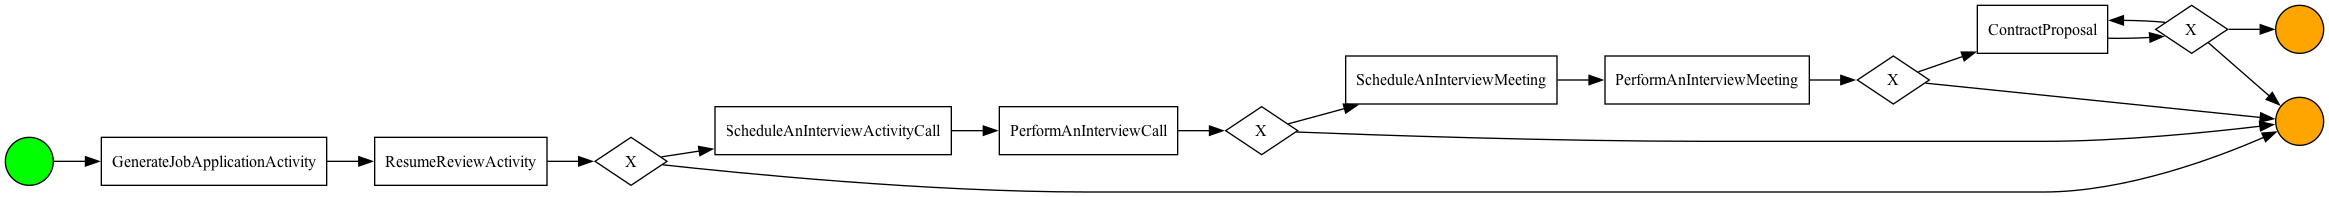

In [7]:
pm4py.view_bpmn(bpmn_graph)

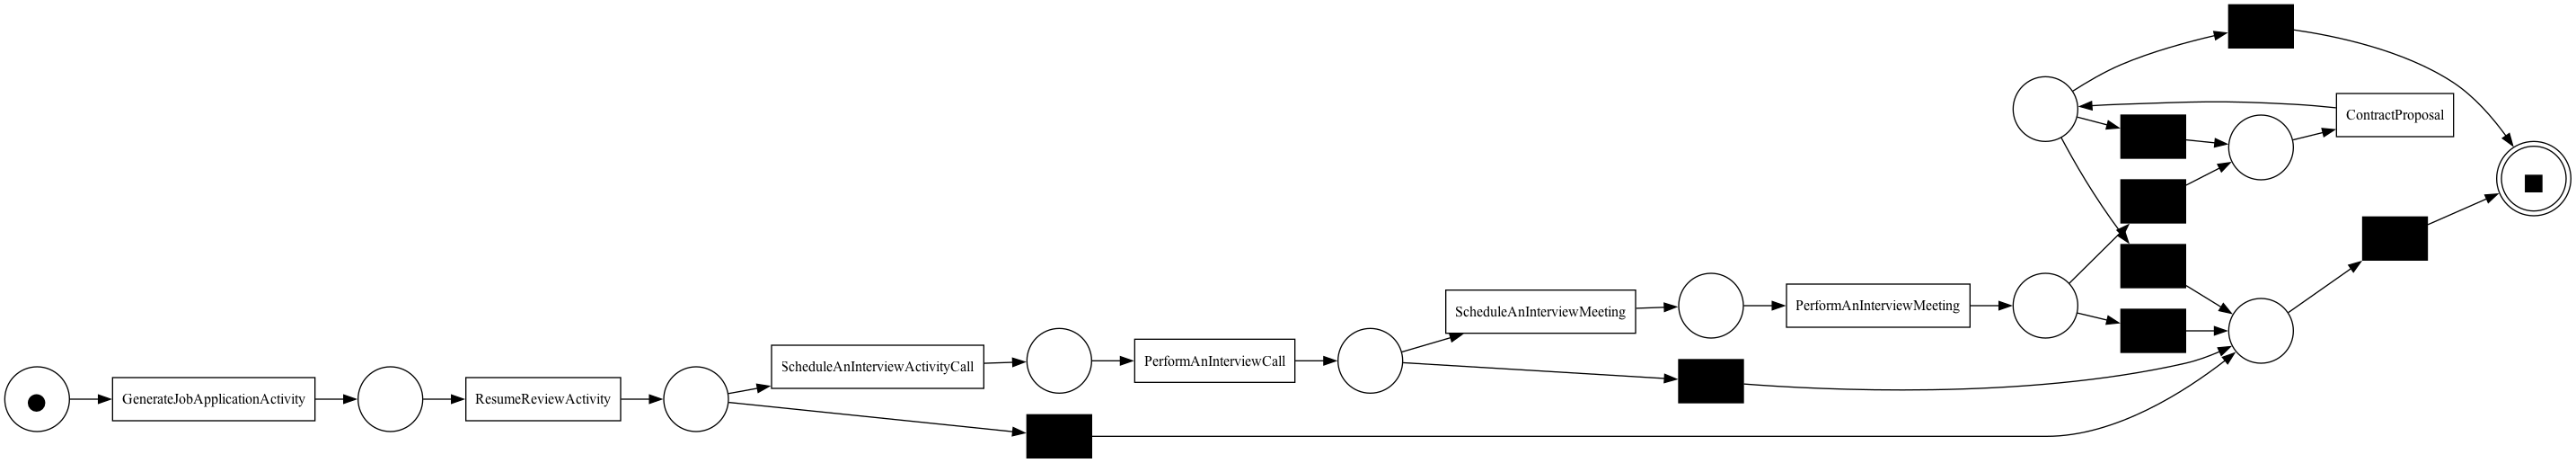

In [8]:
pm4py.view_petri_net(petri_net,im,fm)

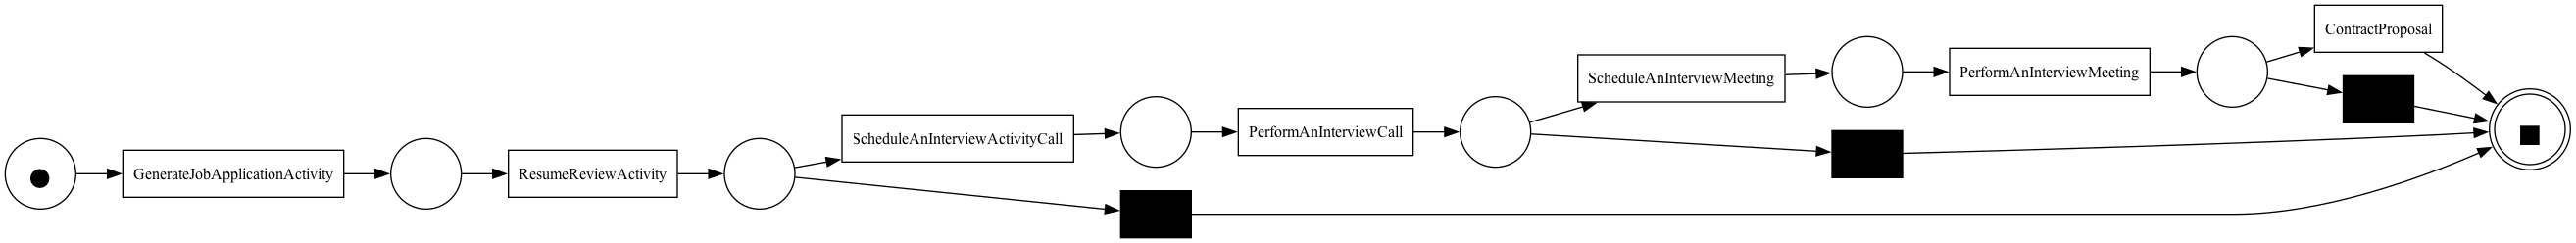

In [9]:
pm4py.view_petri_net(petri_net_t,im_t,fm_t)

## Conformance Checking

### Alignment 

In [10]:
log_fitness = pm4py.conformance.fitness_alignments(log_in, petri_net_t,im_t,fm_t, **args)["log_fitness"]

aligning log, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
log_precision =pm4py.conformance.precision_alignments(log_in, petri_net_t,im_t,fm_t, **args)

computing precision with alignments, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
(log_fitness+log_precision) /2

0.9999921054016596

In [13]:
log_precision

1.0

In [14]:
log_fitness

0.9999842108033192

### Replay 

In [15]:
pm4py.conformance_diagnostics_token_based_replay(log_in, petri_net_t,im_t,fm_t, **args)

replaying log with TBR, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

[{'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(335ff795-6065-4359-bf50-9b22a0e453f7, 'GenerateJobApplicationActivity'),
   (57fdaf15-f73c-4818-a887-786993e4df41, 'ResumeReviewActivity'),
   (skip_1, None)],
  'reached_marking': ['sink:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 4,
  'remaining_tokens': 0,
  'produced_tokens': 4},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(335ff795-6065-4359-bf50-9b22a0e453f7, 'GenerateJobApplicationActivity'),
   (57fdaf15-f73c-4818-a887-786993e4df41, 'ResumeReviewActivity'),
   (skip_1, None)],
  'reached_marking': ['sink:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 4,
  'remaining_tokens': 0,
  'produced_tokens': 4},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(335ff795-6065-4359-bf50-9b22a0e45